In [5]:
import numpy as np
import cmath

In [6]:
f_in = open("data.txt", "r")

data = [ complex(line) for line in f_in ]
N = len(data)

if N & (N - 1):
    data = "Number of values must be a power of 2"
    
print data
f_in.close()

[(1+3j), (-7.4+3.12j), (-5.43-1.23j), (15+0j)]


In [7]:
def fft(data):
    
    N = len(data)
    
    if N == 2:
        return np.array([data[0] + data[1], data[0] + data[1] * np.exp(-1j * np.pi)])
    else:
        even, odd = fft(data[0::2]), fft(data[1::2])
        w = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([even + w[0:N / 2] * odd, even + w[N / 2:] * odd])

In [31]:
def b_fft(data):
    
    N = len(data)
    
    if N == 2:
        return np.array([data[0] + data[1], data[0] + data[1] * np.exp(1j * np.pi)])
    else:
        even, odd = b_fft(data[0::2]), b_fft(data[1::2])
        w = np.exp(2j * np.pi * np.arange(N) / N)
        return (np.concatenate([even + w[0:N / 2] * odd, even + w[N / 2:] * odd]))

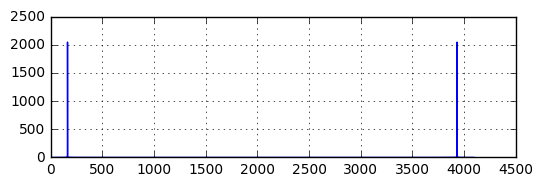

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

data = np.sin(np.arange(0, 1024, 0.25))

plt.subplot(211)
plt.plot( np.arange( len(data) ), np.absolute( res ) )
plt.grid(True)

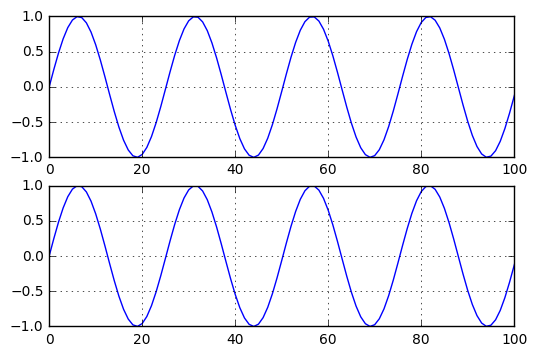

In [52]:
data = np.sin(np.arange(0, 1024, 0.25))
res = fft(data)
b_res = b_fft(res)

plt.subplot(211)
plt.plot( np.arange(len(data)), b_res/len(data) )
plt.axis([0, 100, -1, 1])
plt.grid(True)

plt.subplot(212)
plt.plot( np.arange( len(data) ), data )
plt.axis([0, 100, -1, 1])
plt.grid(True)
plt.show()